In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import datetime as dt
%matplotlib inline

In [3]:
'''
Importing the text file which contains the chat of the group
in read mode using utf-8 encoding!

'''

f = open('WhatsApp Chat with EIE unofficial.txt','r',encoding='utf-8')

data = f.read()



In [4]:
dummy = data.split('\n')
dummy

['16/11/21, 21:38 - Sarada Prasad Panda Nitrkl: Hai*',
 '16/11/21, 21:38 - +91 70445 99395: This message was deleted',
 '16/11/21, 21:38 - +91 93371 51971: Hn uda bhay mazak\U0001f972',
 '16/11/21, 21:39 - Siddharth SecD: Mein apna bola re🙂',
 '16/11/21, 21:39 - Siddharth SecD: Tera nhin pata',
 '16/11/21, 21:39 - Siddharth SecD: Bt check maths grp',
 '16/11/21, 21:40 - Sarada Prasad Panda Nitrkl: Bhai khudko kyu chupa raha hai, tera highest hoga analog mein, iss bar end sem mein, me tera ghar ko jaunga, bata dena bhai, mana mat karna',
 '16/11/21, 21:40 - Sarada Prasad Panda Nitrkl: Acha',
 '16/11/21, 21:40 - Siddharth SecD: Mera katt gya',
 '16/11/21, 21:40 - Siddharth SecD: Tera 24.5 hi hai maths',
 '16/11/21, 21:41 - Sarada Prasad Panda Nitrkl: Pehel me kitna tha',
 '16/11/21, 21:41 - Siddharth SecD: 23.5',
 '16/11/21, 21:41 - Sarada Prasad Panda Nitrkl: Hmm, but top mark nhi chahiye',
 '16/11/21, 21:41 - Sarada Prasad Panda Nitrkl: Acha',
 '16/11/21, 21:41 - Siddharth SecD: 😌😌',
 

In [5]:
'''
Example for dry run : '16/08/18, 20:09 - '

\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s

the first part "d{1,2}" this means here we can have one or 2 digits
then after we have "/"
then after we have "d{1,2}" again,same we can have one or 2 digits
then after we have "/"
then after we have "d{2,4}" here we check for 2 or more digits
then we have a space represented as "\s"
then we have hour representation it can take either one or 2 digits 
then we have a seperator ":" 
and the pattern repeats so on..

'''

# username and message in different col

pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
messages = re.split(pattern,data)[1:]
print(len(messages))

## extracting dates as well in different col

dates = re.findall(pattern,data)
print(len(dates))

39999
39999


In [14]:
messages

['Hai*\n',
 'This message was deleted\n',
 'Hn uda bhay mazak\U0001f972\n',
 'Mein apna bola re🙂\n',
 'Tera nhin pata\n',
 'Bt check maths grp\n',
 'Bhai khudko kyu chupa raha hai, tera highest hoga analog mein, iss bar end sem mein, me tera ghar ko jaunga, bata dena bhai, mana mat karna\n',
 'Acha\n',
 'Mera katt gya\n',
 'Tera 24.5 hi hai maths\n',
 'Pehel me kitna tha\n',
 '23.5\n',
 'Hmm, but top mark nhi chahiye\n',
 'Acha\n',
 '😌😌\n',
 'Andhakar hi andhakar\n',
 'Bhai, msg ko ignore karta hai, bol tera address\n',
 '🤣🤣😂😂\n',
 'Rkl sec17\n',
 '<Media omitted>\n',
 'Tu galat sum kiya hoga 😂😂 23 aayega tera\n',
 '👀👀👀\n',
 'Naa bro 21 hi hai\n',
 'Parso  ke total 10 aur aaj ke 13\n',
 'Bro abhi 4.5 mila hai\n',
 'Oh sry my bad\n',
 '😁😁\n',
 'Bhai analog kiska highest aaya batao\n',
 'One n only @919668749887\n',
 'Acha\n',
 'Bhay k hote hue u r asking 😒\n',
 '@918277467085 ?\n',
 '@919078587157\n',
 'Bhai vo aaj ke lab ka konse software pe karna hai\n',
 '@919861683883 @917978028673\

In [6]:
# this is a simple time string,we will appply this kind of transformation
# inorder to get the date and the time for our analysis

string = '16/08/18, 20:09 - '
string = string.split(',')
date,time = string[0],string[1]
time = time.split('-')
time = time[0].strip()
print(date+" and "+time)

16/08/18 and 20:09


In [7]:
# this function is to seperate the time and date

def gettimeanddate(string):
    string = string.split(',')
    date,time = string[0],string[1]
    time = time.split('-')
    time = time[0].strip()
    
    return date+" "+time




In [8]:
# creating a dataframe for messages and their dates

df = pd.DataFrame({'user_messages':messages,
                   'message_date':dates})

df['message_date'] = df['message_date'].apply(lambda text:gettimeanddate(text))
df.rename(columns={'message_date':'date'},inplace=True)

df.head()

,user_messages,date
0,Sarada Prasad Panda Nitrkl: Hai*\n,16/11/21 21:38
1,+91 70445 99395: This message was deleted\n,16/11/21 21:38
2,+91 93371 51971: Hn uda bhay mazak🥲\n,16/11/21 21:38
3,Siddharth SecD: Mein apna bola re🙂\n,16/11/21 21:39
4,Siddharth SecD: Tera nhin pata\n,16/11/21 21:39


In [9]:
df['user_messages']

0                       Sarada Prasad Panda Nitrkl: Hai*\n
1              +91 70445 99395: This message was deleted\n
2                    +91 93371 51971: Hn uda bhay mazak🥲\n
3                     Siddharth SecD: Mein apna bola re🙂\n
4                         Siddharth SecD: Tera nhin pata\n
5                     Siddharth SecD: Bt check maths grp\n
6        Sarada Prasad Panda Nitrkl: Bhai khudko kyu ch...
7                       Sarada Prasad Panda Nitrkl: Acha\n
8                          Siddharth SecD: Mera katt gya\n
9                 Siddharth SecD: Tera 24.5 hi hai maths\n
10        Sarada Prasad Panda Nitrkl: Pehel me kitna tha\n
11                                  Siddharth SecD: 23.5\n
12       Sarada Prasad Panda Nitrkl: Hmm, but top mark ...
13                      Sarada Prasad Panda Nitrkl: Acha\n
14                                    Siddharth SecD: 😌😌\n
15                  Siddharth SecD: Andhakar hi andhakar\n
16       Sarada Prasad Panda Nitrkl: Bhai, msg ko ignor.

In [10]:
'''
if we observe the usermessage,we find that the 
username is attached with the user message,so i need to get rid
of this,for that i will use the concept of the regular expression

sample of the regular expression output

['', 'Chinmayee', 'Hello this is official grup\n']

so here we can see that the username is at index 1 and message is at index2

sometimes it happens that we get the group notification,so 
for that case we have to handle it accordingly!


 Chinmayee: Hello this is official grup
 
 Chinmayee added you\n-->['Chinmayee added you','\n']

'''

users = []
messages = []

for message in df['user_messages']:
    
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])

        
    else:
        users.append('Group Notification')
        messages.append(entry[0])
        
        
df['User'] = users
df['message'] = messages


def getstring(text):
    return text.split('\n')[0]

df['message'] = df['message'].apply(lambda text:getstring(text))


df = df.drop(['user_messages'],axis=1)
df = df[['message','date','User']]

df = df.rename(columns={'message':'Message',
                       'date':'Date'})



df.head()

,Message,Date,User
0,Hai*,16/11/21 21:38,Sarada Prasad Panda Nitrkl
1,This message was deleted,16/11/21 21:38,+91 70445 99395
2,Hn uda bhay mazak🥲,16/11/21 21:38,+91 93371 51971
3,Mein apna bola re🙂,16/11/21 21:39,Siddharth SecD
4,Tera nhin pata,16/11/21 21:39,Siddharth SecD


In [11]:
# 16/08/18 20:09
    
# YYYY-MM-DD

SyntaxError: invalid token (1600446170.py, line 1)

In [12]:
df.shape

(39999, 3)

In [15]:
df['Only date'] = pd.to_datetime(df['Date']).dt.date

df['Year'] = pd.to_datetime(df['Date']).dt.year

df['Month_num'] = pd.to_datetime(df['Date']).dt.month

df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

df['Day'] = pd.to_datetime(df['Date']).dt.day

df['Day_name'] = pd.to_datetime(df['Date']).dt.day_name()


df['Hour'] = pd.to_datetime(df['Date']).dt.hour

df['Minute'] = pd.to_datetime(df['Date']).dt.minute


df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Hai*,16/11/21 21:38,Sarada Prasad Panda Nitrkl,2021-11-16,2021,11,November,16,Tuesday,21,38
1,This message was deleted,16/11/21 21:38,+91 70445 99395,2021-11-16,2021,11,November,16,Tuesday,21,38
2,Hn uda bhay mazak🥲,16/11/21 21:38,+91 93371 51971,2021-11-16,2021,11,November,16,Tuesday,21,38
3,Mein apna bola re🙂,16/11/21 21:39,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,39
4,Tera nhin pata,16/11/21 21:39,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,39


In [16]:
df[df['User'] == 'Siddharth SecD']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
3,Mein apna bola re🙂,16/11/21 21:39,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,39
4,Tera nhin pata,16/11/21 21:39,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,39
5,Bt check maths grp,16/11/21 21:39,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,39
8,Mera katt gya,16/11/21 21:40,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,40
9,Tera 24.5 hi hai maths,16/11/21 21:40,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,40
11,23.5,16/11/21 21:41,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,41
14,😌😌,16/11/21 21:41,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,41
15,Andhakar hi andhakar,16/11/21 21:41,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,41
17,🤣🤣😂😂,16/11/21 21:42,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,42
18,Rkl sec17,16/11/21 21:42,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,42


In [17]:
words = []
for message in df['Message']:
    words.extend(message.split())

print(len(words))

171196


In [18]:
words

['Hai*',
 'This',
 'message',
 'was',
 'deleted',
 'Hn',
 'uda',
 'bhay',
 'mazak\U0001f972',
 'Mein',
 'apna',
 'bola',
 're🙂',
 'Tera',
 'nhin',
 'pata',
 'Bt',
 'check',
 'maths',
 'grp',
 'Bhai',
 'khudko',
 'kyu',
 'chupa',
 'raha',
 'hai,',
 'tera',
 'highest',
 'hoga',
 'analog',
 'mein,',
 'iss',
 'bar',
 'end',
 'sem',
 'mein,',
 'me',
 'tera',
 'ghar',
 'ko',
 'jaunga,',
 'bata',
 'dena',
 'bhai,',
 'mana',
 'mat',
 'karna',
 'Acha',
 'Mera',
 'katt',
 'gya',
 'Tera',
 '24.5',
 'hi',
 'hai',
 'maths',
 'Pehel',
 'me',
 'kitna',
 'tha',
 '23.5',
 'Hmm,',
 'but',
 'top',
 'mark',
 'nhi',
 'chahiye',
 'Acha',
 '😌😌',
 'Andhakar',
 'hi',
 'andhakar',
 'Bhai,',
 'msg',
 'ko',
 'ignore',
 'karta',
 'hai,',
 'bol',
 'tera',
 'address',
 '🤣🤣😂😂',
 'Rkl',
 'sec17',
 '<Media',
 'omitted>',
 'Tu',
 'galat',
 'sum',
 'kiya',
 'hoga',
 '😂😂',
 '23',
 'aayega',
 'tera',
 '👀👀👀',
 'Naa',
 'bro',
 '21',
 'hi',
 'hai',
 'Parso',
 'ke',
 'total',
 '10',
 'aur',
 'aaj',
 'ke',
 '13',
 'Bro',
 'abhi

In [49]:
df[(df['Message'] == '<Media omitted>')&(df['User'] == 'Siddharth SecD')].shape

(353, 11)

In [20]:
df['Message'].unique()

array(['Hai*', 'This message was deleted', 'Hn uda bhay mazak\U0001f972',
       ..., 'U r the one giving flowers😮\u200d💨', 'You want too?',
       'Free flowers'], dtype=object)

In [21]:
df[df['Message']=='<Media omitted>']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
19,<Media omitted>,16/11/21 21:42,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,42
57,<Media omitted>,17/11/21 00:01,+91 83277 80637,2021-11-17,2021,11,November,17,Wednesday,0,1
58,<Media omitted>,17/11/21 00:12,+91 82774 67085,2021-11-17,2021,11,November,17,Wednesday,0,12
93,<Media omitted>,17/11/21 10:18,+91 99376 56643,2021-11-17,2021,11,November,17,Wednesday,10,18
169,<Media omitted>,17/11/21 12:10,Siddharth SecD,2021-11-17,2021,11,November,17,Wednesday,12,10
186,<Media omitted>,17/11/21 12:32,Siddharth SecD,2021-11-17,2021,11,November,17,Wednesday,12,32
214,<Media omitted>,17/11/21 14:15,Sarada Prasad Panda Nitrkl,2021-11-17,2021,11,November,17,Wednesday,14,15
216,<Media omitted>,17/11/21 14:15,+91 81149 03015,2021-11-17,2021,11,November,17,Wednesday,14,15
217,<Media omitted>,17/11/21 14:16,+91 81149 03015,2021-11-17,2021,11,November,17,Wednesday,14,16
227,<Media omitted>,17/11/21 14:20,+91 6205 721 617,2021-11-17,2021,11,November,17,Wednesday,14,20


In [22]:
df['User'].value_counts().head()

Deviprasad Bal NITR EI     6095
Siddharth SecD             3537
Khitish Agarwal EI Nitr    2346
Srujan EI NITR             2159
Pramod Goyal EI Nit R      1937
Name: User, dtype: int64

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

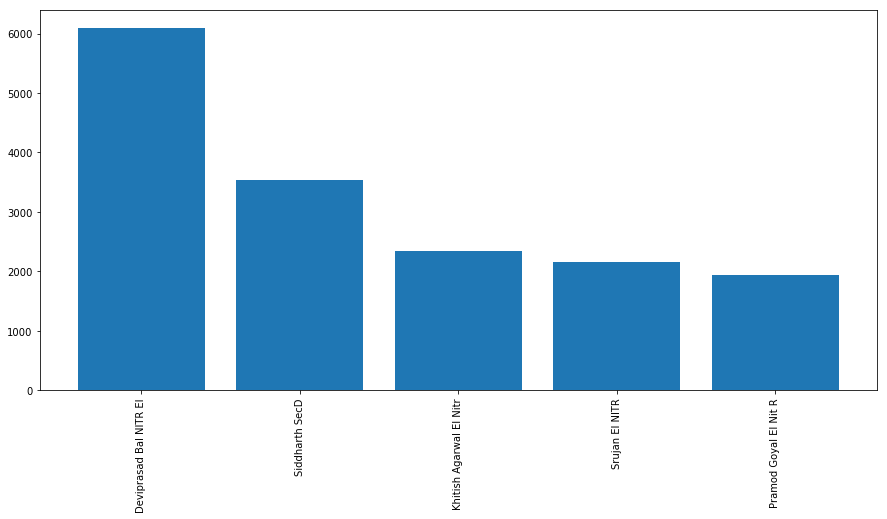

In [23]:
counts = df['User'].value_counts().head()
plt.figure(figsize=(15,7))
plt.bar(counts.index,counts.values)
plt.xticks(rotation = 'vertical')

In [24]:
# computationally heavy

wordmap = {}
for message in df['Message']:
    dummy = message.split()
    for word in dummy:
        if word in wordmap:
            wordmap[word]+=1

        else:
            wordmap[word] = 1
            
            
wordmap = dict(sorted(wordmap.items(),key = lambda x:x[1],reverse = True))

wordmap

{'<Media': 3844,
 'omitted>': 3844,
 'hai': 3299,
 'to': 1608,
 'ka': 1357,
 'kya': 1218,
 'me': 1195,
 'the': 1186,
 'was': 989,
 'ke': 985,
 'se': 978,
 'message': 933,
 'This': 907,
 'deleted': 848,
 'bhi': 820,
 'I': 817,
 'is': 797,
 'ho': 766,
 'tha': 730,
 '😂': 705,
 'ko': 685,
 'bhai': 676,
 'raha': 672,
 'nahi': 667,
 'class': 658,
 'toh': 655,
 'hi': 644,
 'na': 614,
 'in': 614,
 'and': 613,
 'nhi': 573,
 'hoga': 529,
 'Happy': 522,
 'main': 515,
 'he': 511,
 '\U0001f972': 495,
 'a': 494,
 'kar': 483,
 'h': 482,
 '?': 479,
 'ki': 477,
 'of': 475,
 'sir': 468,
 'for': 460,
 '🙂': 440,
 'koi': 417,
 'viva': 415,
 'aur': 399,
 'Kya': 398,
 'Bhai': 394,
 'ye': 391,
 '😂😂': 385,
 'kuch': 379,
 'you': 379,
 'this': 372,
 'be': 371,
 'mai': 368,
 'v': 355,
 'lab': 352,
 'hua': 349,
 'mein': 348,
 'ek': 339,
 'that': 338,
 'we': 337,
 'bro': 325,
 'do': 324,
 'wo': 321,
 'gaya': 316,
 'sab': 312,
 'it': 308,
 'have': 304,
 'time': 284,
 'on': 282,
 'Birthday': 282,
 ',': 280,
 'u': 278

In [25]:
# top 20 words used in the whatsapp group

from collections import Counter
words = []
for message in df['Message']:
    words.extend(message.split())
    
wordmap = dict(Counter(words).most_common(20))
wordmap = dict(sorted(wordmap.items(),key=lambda x:x[1],reverse=True))
newdf = pd.DataFrame(wordmap.items())
newdf

,0,1
0,<Media,3844
1,omitted>,3844
2,hai,3299
3,to,1608
4,ka,1357
5,kya,1218
6,me,1195
7,the,1186
8,was,989
9,ke,985


In [ ]:
a,an,the,you,ok,...

In [26]:
temp = df[(df['User']!='Group Notification') | (df['User']!='<Media omitted>')]
temp

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Hai*,16/11/21 21:38,Sarada Prasad Panda Nitrkl,2021-11-16,2021,11,November,16,Tuesday,21,38
1,This message was deleted,16/11/21 21:38,+91 70445 99395,2021-11-16,2021,11,November,16,Tuesday,21,38
2,Hn uda bhay mazak🥲,16/11/21 21:38,+91 93371 51971,2021-11-16,2021,11,November,16,Tuesday,21,38
3,Mein apna bola re🙂,16/11/21 21:39,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,39
4,Tera nhin pata,16/11/21 21:39,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,39
5,Bt check maths grp,16/11/21 21:39,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,39
6,"Bhai khudko kyu chupa raha hai, tera highest h...",16/11/21 21:40,Sarada Prasad Panda Nitrkl,2021-11-16,2021,11,November,16,Tuesday,21,40
7,Acha,16/11/21 21:40,Sarada Prasad Panda Nitrkl,2021-11-16,2021,11,November,16,Tuesday,21,40
8,Mera katt gya,16/11/21 21:40,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,40
9,Tera 24.5 hi hai maths,16/11/21 21:40,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,40


In [27]:
def gettopwords(selecteduser,df):

    # getting the stopwords

    file = open('stop_hinglish.txt','r')
    stopwords = file.read()
    stopwords = stopwords.split('\n')
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    temp = df[(df['User']!='Group Notification') |
             (df['User']!='<Media omitted>')]
    
    words = []
    
    for message in df['Message']:
        for word in message.lower().split():
            if word not in stopwords:
                words.append(word)
                
    
    mostcommon = pd.DataFrame(Counter(words).most_common(20))
    return mostcommon



mostcommon = gettopwords('Overall',df)

mostcommon


,0,1
0,<media,3844
1,omitted>,3844
2,message,935
3,deleted,849
4,class,816
5,😂,705
6,happy,561
7,🥲,495
8,birthday,494
9,viva,491


In [28]:
import emoji

In [47]:
df['Message']

0                                                     Hai*
1                                 This message was deleted
2                                       Hn uda bhay mazak🥲
3                                       Mein apna bola re🙂
4                                           Tera nhin pata
5                                       Bt check maths grp
6        Bhai khudko kyu chupa raha hai, tera highest h...
7                                                     Acha
8                                            Mera katt gya
9                                   Tera 24.5 hi hai maths
10                                      Pehel me kitna tha
11                                                    23.5
12                           Hmm, but top mark nhi chahiye
13                                                    Acha
14                                                      😌😌
15                                    Andhakar hi andhakar
16         Bhai, msg ko ignore karta hai, bol tera addre

In [53]:
import re
# re.findall(r'[^\w\s,]', a_list[0])

def emojihelp(selecteduser,df):
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    emojis = []
    for message in df['Message']:
#         emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

#         emojisz = emoji.distinct_emoji_list(message)
#         emojis.extend([emoji.demojize(is_emoji) for is_emoji in emojisz])
          emojisz = re.findall(r'[^\w\s,]', message)
          emojis.extend(emojisz)
    
    emojidf = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
    
    return emojidf


dfmoji = emojihelp('Overall',df)
dfmoji

,0,1
0,.,5213
1,?,4333
2,>,3868
3,<,3848
4,😂,3564
5,@,1934
6,🤣,1460
7,+,1382
8,🥲,1261
9,',1169


In [21]:
dfmoji.columns = ['Emoji','Count']
dfmoji

,Emoji,Count
0,✋,183
1,🏻,88
2,😂,41
3,👍,39
4,👆,38
...,...,...
69,✨,1
70,🔝,1
71,🙌,1
72,🤟,1


In [30]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Hai*,16/11/21 21:38,Sarada Prasad Panda Nitrkl,2021-11-16,2021,11,November,16,Tuesday,21,38
1,This message was deleted,16/11/21 21:38,+91 70445 99395,2021-11-16,2021,11,November,16,Tuesday,21,38
2,Hn uda bhay mazak🥲,16/11/21 21:38,+91 93371 51971,2021-11-16,2021,11,November,16,Tuesday,21,38
3,Mein apna bola re🙂,16/11/21 21:39,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,39
4,Tera nhin pata,16/11/21 21:39,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,39


In [31]:
'''
We want the count of messages month-wise,
so we will apply group by and then by 
adding reset_index() we will get the 
result in a dataframe format

then we will add the "Year and month columns" 
like "January-2018",so that to analyze the things become simple

'''


def monthtimeline(selecteduser,df):


    temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index().sort_values(['Message'])
    
    time = []
    for i in range(temp.shape[0]):
        time.append(temp['Month'][i]+"-"+str(temp['Year'][i]))
        
    temp['Time'] = time
    
    return temp

In [32]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Hai*,16/11/21 21:38,Sarada Prasad Panda Nitrkl,2021-11-16,2021,11,November,16,Tuesday,21,38
1,This message was deleted,16/11/21 21:38,+91 70445 99395,2021-11-16,2021,11,November,16,Tuesday,21,38
2,Hn uda bhay mazak🥲,16/11/21 21:38,+91 93371 51971,2021-11-16,2021,11,November,16,Tuesday,21,38
3,Mein apna bola re🙂,16/11/21 21:39,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,39
4,Tera nhin pata,16/11/21 21:39,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,39


In [ ]:
1,2,2,3,4,4,4,5,6,7,3,4


1| 2 2 | 3 3| 4 4 4 4 | 5 | 6 | 7

{4 : 4, 3:2 , 2:2,} 

In [33]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2021,1,January,617
1,2021,2,February,726
2,2021,3,March,150
3,2021,4,April,299
4,2021,5,May,126
5,2021,6,June,508
6,2021,7,July,308
7,2021,8,August,478
8,2021,9,September,107
9,2021,10,October,106


In [34]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2021,1,January,617
1,2021,2,February,726
2,2021,3,March,150
3,2021,4,April,299
4,2021,5,May,126
5,2021,6,June,508
6,2021,7,July,308
7,2021,8,August,478
8,2021,9,September,107
9,2021,10,October,106


In [35]:
temp.shape

(24, 4)

In [36]:
str(temp['Month'][0])+"-"+str(temp['Year'][0])

'January-2021'

In [37]:
time = []
for i in range(temp.shape[0]):
    time.append(temp['Month'][i]+ "-" +str(temp['Year'][i]))
    
temp['Time'] = time

temp

,Year,Month_num,Month,Message,Time
0,2021,1,January,617,January-2021
1,2021,2,February,726,February-2021
2,2021,3,March,150,March-2021
3,2021,4,April,299,April-2021
4,2021,5,May,126,May-2021
5,2021,6,June,508,June-2021
6,2021,7,July,308,July-2021
7,2021,8,August,478,August-2021
8,2021,9,September,107,September-2021
9,2021,10,October,106,October-2021


In [38]:
temp

,Year,Month_num,Month,Message,Time
0,2021,1,January,617,January-2021
1,2021,2,February,726,February-2021
2,2021,3,March,150,March-2021
3,2021,4,April,299,April-2021
4,2021,5,May,126,May-2021
5,2021,6,June,508,June-2021
6,2021,7,July,308,July-2021
7,2021,8,August,478,August-2021
8,2021,9,September,107,September-2021
9,2021,10,October,106,October-2021


In [39]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Hai*,16/11/21 21:38,Sarada Prasad Panda Nitrkl,2021-11-16,2021,11,November,16,Tuesday,21,38
1,This message was deleted,16/11/21 21:38,+91 70445 99395,2021-11-16,2021,11,November,16,Tuesday,21,38
2,Hn uda bhay mazak🥲,16/11/21 21:38,+91 93371 51971,2021-11-16,2021,11,November,16,Tuesday,21,38
3,Mein apna bola re🙂,16/11/21 21:39,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,39
4,Tera nhin pata,16/11/21 21:39,Siddharth SecD,2021-11-16,2021,11,November,16,Tuesday,21,39


In [40]:
temp1 = df['Day_name'].value_counts()

In [41]:
temp1

Tuesday      7590
Thursday     7439
Monday       6566
Wednesday    5564
Friday       5260
Sunday       4027
Saturday     3553
Name: Day_name, dtype: int64

In [42]:
list(temp1.index)

['Tuesday', 'Thursday', 'Monday', 'Wednesday', 'Friday', 'Sunday', 'Saturday']

In [43]:
list(temp1.values)

[7590, 7439, 6566, 5564, 5260, 4027, 3553]

In [44]:
temp2 = df['Month'].value_counts()

In [45]:
temp2

November     12074
January       5165
March         4965
February      4237
July          2478
April         2424
June          2029
December      1707
October       1622
August        1567
May           1366
September      365
Name: Month, dtype: int64

In [46]:
list(temp2.index),list(temp2.values)

(['November',
  'January',
  'March',
  'February',
  'July',
  'April',
  'June',
  'December',
  'October',
  'August',
  'May',
  'September'],
 [12074, 5165, 4965, 4237, 2478, 2424, 2029, 1707, 1622, 1567, 1366, 365])